# Analisando os Sentimentos na Discografia de Normani
A análise de sentimentos e inferência de emoções em músicas são técnicas que buscam identificar e interpretar as emoções expressas nas letras das canções. Esse tipo de análise utiliza algoritmos e modelos de aprendizado de máquina, como o Processamento de Linguagem Natural (PLN), para avaliar as palavras e frases contidas nas letras, classificando-as em polaridades como positivo, negativo ou neutro.

As letras de músicas são ricas em emoção e podem refletir uma ampla gama de sentimentos, como amor, tristeza, alegria, raiva e nostalgia, logo, a análise de sentimentos permite que artistas, produtores e ouvintes compreendam melhor como a música pode impactar as emoções humanas e a percepção do público. Com o avanço das tecnologias de Inteligência Artificial (IA) e PLN, a análise de sentimento em músicas está se tornando cada vez mais sofisticada, permitindo uma compreensão mais profunda e complexa das emoções humanas expressas através da arte musical.

## Importando Bibliotecas

In [1]:
# Importando bibliotecas de manipulação e análise de dados
import pandas as pd  # Usado para manipulação de tabelas e dataframes
import numpy as np   # Usado para operações matemáticas e arrays numéricos

# Biblioteca para processamento de imagens
from PIL import Image  # Usado para abrir, manipular e processar imagens

# Biblioteca para geração de nuvem de palavras (wordcloud)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS: remove palavras irrelevantes
# ImageColorGenerator: usa as cores de uma imagem para colorir a wordcloud

# Biblioteca de NLP (Processamento de Linguagem Natural)
from nltk.tokenize import word_tokenize  # Quebra textos em palavras (tokens)

# Biblioteca para visualização de dados
import matplotlib.pyplot as plt  # Criação de gráficos e visualizações
from matplotlib.pyplot import figure  # Ajuste de tamanho de figuras
%matplotlib inline

# Baixando recursos da biblioteca NLTK
import nltk
nltk.download('punkt_tab')  # Tokenizador de pontuação/tabulação
nltk.download('vader_lexicon')  # Léxico para análise de sentimentos com VADER (análise de sentimentos)

# Biblioteca de visualização estatística
import seaborn as sns  # Estilização e gráficos estatísticos avançados

# Instalando bibliotecas com ! (comando de terminal usado no Jupyter)
!pip install shapely  # manipulação de formas geométricas
!pip install descartes       # Necessária para exibir formas geométricas com matplotlib
!pip install pyplutchik      # Biblioteca para visualização de emoções com o modelo de Plutchik

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Carregando arquivo com as músicas da Banda

O arquivo CSV foi gerado no notebook *Lyrics.ipynb*, contendo informações detalhadas sobre as músicas da famosa cantora. O *dataset* inclui dados como título das faixas, álbum e ano de lançamento através da API *Genius*. A exportação para CSV permite uma fácil visualização, análise e compartilhamento dos dados.

In [2]:
# Leitura do Arquivo
df=pd.read_csv("NormaniLyrics.csv")

# Remove a coluna 'release_date'
df = df.drop(columns=['release_date'])

# Eliminando músicas remix e repetidas
df = df.drop(index=[7,19])

# Reseta o índice, se necessário
df.reset_index(drop=True, inplace=True)

# Visualização do Dataframe
df

title                                             lyrics  \
0        Wild Side   normani ready pull ready baby wanna shoot sho...   
1       Motivation   break motivation stay give tonight baby turn ...   
2            Waves   normani thank weekend friends rather liquor s...   
3      Candy Paint   bank roll thumbin baby know comin booty bubon...   
4        Checklist   wizkid normani gyal come whine yeah yeah yeah...   
5             Fair   hundred days countin know favorite still when...   
6        Slow Down   normani everybody slow down everybody everybo...   
7             1:59   normani turn turn  normani phone ringin time ...   
8          Big Boy   starrah  normani starrah kickin coolin bitch ...   
9        All Yours   there somethin likin much frightenin bite lik...   
10           Still   still tippin four fours wrapped wrapped four ...   
11        Insomnia   normani thought going crazy better lately fin...   
12       Lights On   yeah right there know feel  even address unle...   
13        Tantrums   normani drop took minute hard tryin look back...   
14    Take My Time   ways explain emotions start racin every time ...   
15  Little Secrets   girl around want automatic want miss already ...   
16            Grip   kung grip kung grip  thicky thicky vibe aroun...   
17        Distance   said never gonna make want myself never gonna...   
18     Sing to You   takes star light night clouds make rise  melo...   

                      Album  release_year  Word Count  
0                  DOPAMINE          2021         246  
1       Motivation - Single          2019         141  
2                       NaN          2018         190  
3                  DOPAMINE          2024         233  
4   Normani x Calvin Harris          2018         199  
5                       NaN          2022         128  
6   Normani x Calvin Harris          2018         163  
7                  DOPAMINE          2024         176  
8                  DOPAMINE          2024         287  
9                  DOPAMINE          2024         209  
10                 DOPAMINE          2024         269  
11                 DOPAMINE          2024         239  
12                 DOPAMINE          2024         199  
13                 DOPAMINE          2024         163  
14                 DOPAMINE          2024         165  
15                 DOPAMINE          2024         173  
16                 DOPAMINE          2024         156  
17                 DOPAMINE          2024         154  
18                      NaN          2013         180

In [3]:
# Lista de palavras indesejadas presentes na discografia e não identificadas na etapa de tokenização
indesejadas = ['that','this','na','yeah','normani']

# Remove as palavras indesejadas, e salva de volta como um texto longo
df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 3345 palavras no dataset de letra.
Existem 718 palavras únicas no dataset de letras.


## Análise da Discografia
Primeiramente, será realizada uma análise exploratória do dataset como um todo, visando compreender sua estrutura, distribuição e características principais. Essa etapa é essencial para identificar padrões, possíveis inconsistências e *insights* iniciais sobre os dados. Essa análise preliminar ajudará a direcionar investigações mais específicas e a garantir a qualidade dos dados antes de aprofundar o estudo.

### Analisando o Dataset

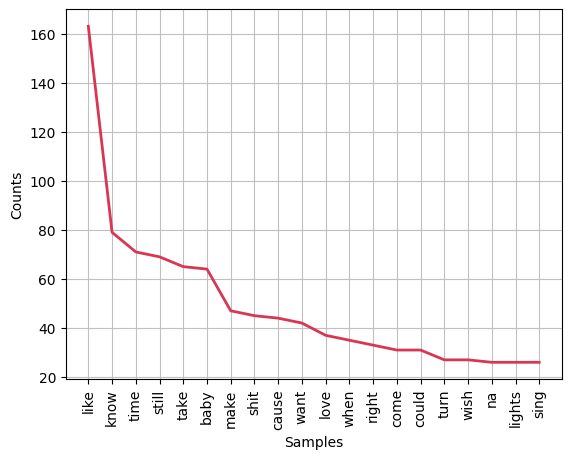

In [4]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Resultado do Gráfico</strong><br>
    Top 20 palavras mais frequentes na discografia da cantora.
</div>

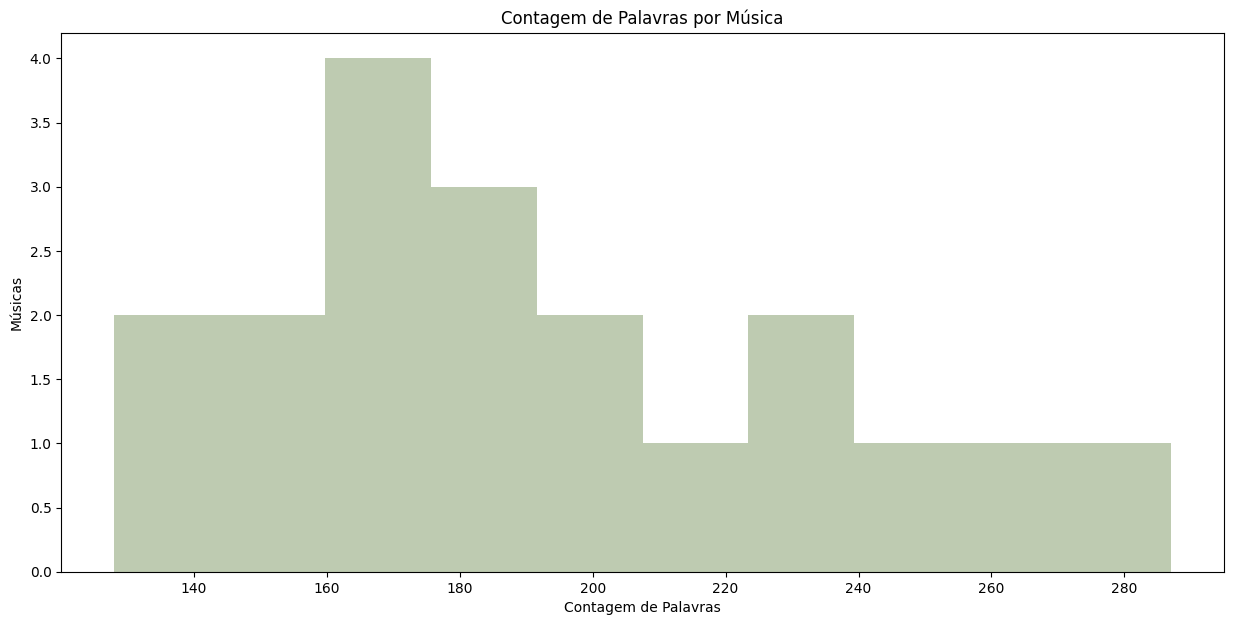

In [5]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    O resultado é um histograma que representa a distribuição da contagem de palavras das músicas. Cada barra no histograma mostra quantas músicas caem dentro de cada intervalo de contagem de palavras. Isso permite visualizar rapidamente como as músicas se distribuem em relação à sua contagem de palavras, identificando padrões, como se a maioria das músicas tende a ser mais curtas ou mais longas.
</div>

### Análise de Sentimento da Discografia

A análise de sentimentos é uma técnica da área de Processamento de Linguagem Natural (PLN) que tem como objetivo identificar e classificar emoções expressas em textos, como opiniões, comentários, avaliações e postagens em redes sociais. Um dos principais aspectos dessa análise é a **polaridade**, que indica a direção do sentimento expresso: **positivo**, **negativo** ou **neutro**.

**Polaridade Positiva** refere-se a textos que expressam sentimentos favoráveis, elogios ou apreciações. Exemplos incluem palavras como "ótimo", "maravilhoso", "excelente" e "gostei". Comentários positivos geralmente indicam satisfação com um produto, serviço ou experiência.

**Polaridade Negativa**, por sua vez, é associada a emoções negativas, críticas ou insatisfações. Termos como "horrível", "péssimo", "não gostei" e "decepcionante" são indicadores comuns. Esse tipo de polaridade ajuda a identificar pontos de melhoria a partir de feedbacks negativos dos usuários.

Já a **Polaridade Neutra** está presente em textos que não expressam uma opinião clara ou não possuem carga emocional significativa. Comentários como "o produto chegou ontem", "estava chovendo" ou "fiz a compra hoje" são exemplos de frases informativas, sem julgamento emocional.

Em aplicações práticas, a identificação correta da polaridade é essencial para empresas e pesquisadores compreenderem melhor o comportamento e a percepção dos usuários. Isso pode influenciar estratégias de marketing, aprimoramento de produtos e até mesmo monitoramento de reputação online.

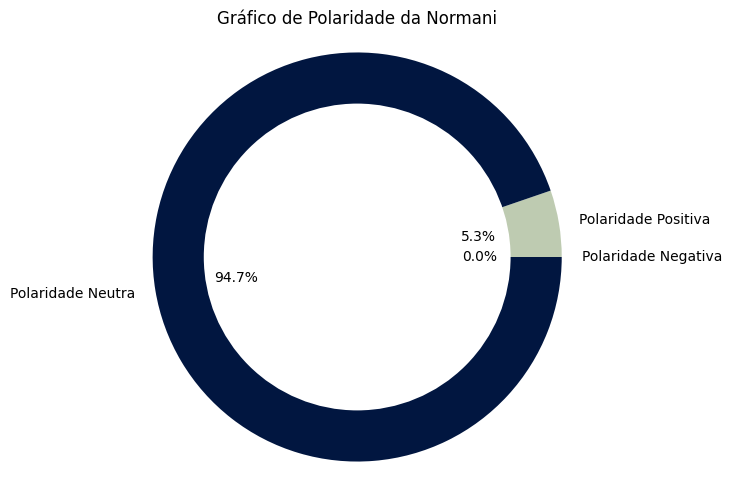

In [6]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade da Normani')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta 94.7% de polaridade neutra, mostrando que suas composições não tem alto teor de intensidade.
</div>

### Nuvem de Palavras
A **nuvem de palavras** (ou *word cloud*, em inglês) é uma técnica visual utilizada para representar a frequência ou relevância de palavras em um determinado conjunto de dados textuais. Nesse tipo de visualização, quanto mais uma palavra aparece em um texto ou conjunto de textos, maior será o seu destaque na nuvem — normalmente por meio de um tamanho de fonte mais elevado.

Essa ferramenta é muito usada em análises exploratórias de dados textuais, especialmente em áreas como análise de sentimentos, mineração de texto, marketing digital, pesquisa acadêmica, entre outras. Ela permite uma compreensão rápida dos termos mais recorrentes em conteúdos como comentários de usuários, postagens em redes sociais, discursos políticos, letras de músicas ou avaliações de produtos.

A construção de uma nuvem de palavras geralmente envolve etapas de pré-processamento do texto, como:
- **Remoção de stopwords** (palavras comuns como “de”, “o”, “e”, que não agregam valor semântico relevante);
- **Lematização ou stemming** (redução de palavras à sua forma base);
- **Tratamento de pontuação e acentuação**.

Embora seja uma técnica simples, a nuvem de palavras oferece uma forma intuitiva e visual de identificar temas recorrentes, tendências e padrões de linguagem.

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count'], dtype='object')


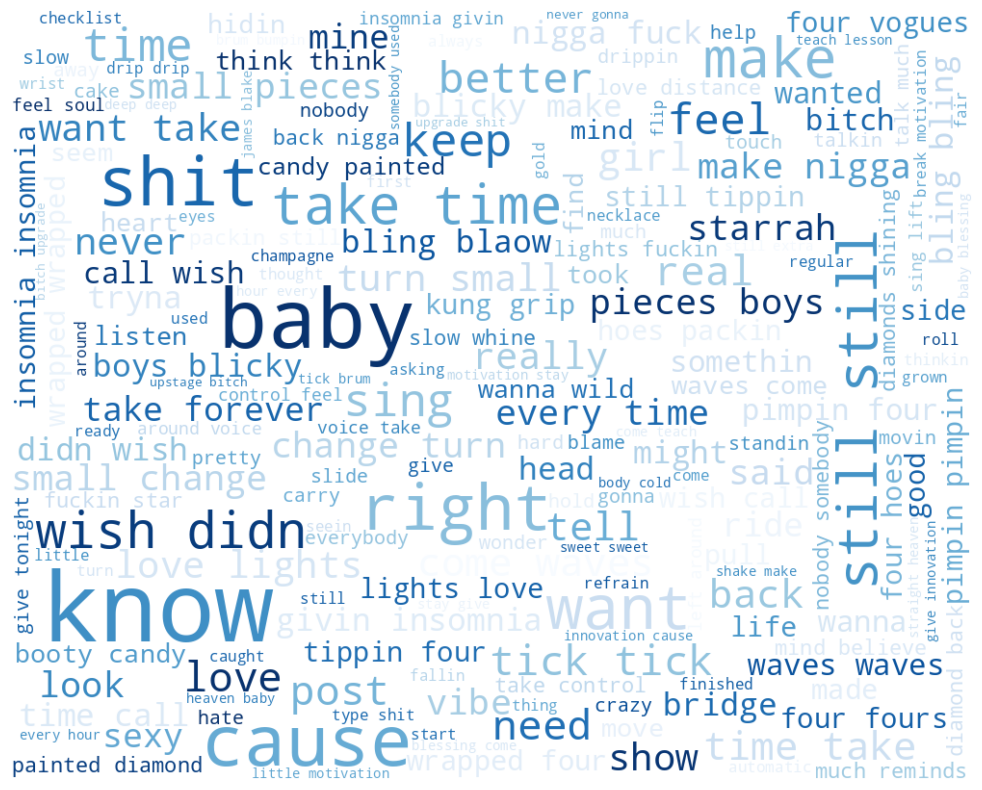

In [7]:
# Exibir os nomes das colunas do DataFrame
print(df.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df['lyrics'] = df['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

## Análise NRC para Inferência de Emoções
O arquivo NRC (National Research Council) é um recurso amplamente utilizado na análise de sentimentos, especialmente no contexto de processamento de linguagem natural (PLN) e mineração de texto. O NRC desenvolveu um léxico de sentimentos que categoriza palavras em diferentes emoções, permitindo que pesquisadores e desenvolvedores analisem letras de músicas, resenhas e outros textos em relação a sentimentos específicos.

### Estrutura do Arquivo NRC
O léxico do NRC é estruturado em várias colunas, onde as palavras são associadas a diferentes emoções e sentimentos, incluindo: Alegria, Tristeza, Medo,
Raiva, Surpresa, Desprezo, Confiança e Antipatia. Cada palavra no léxico é marcada como presente ou ausente em relação a essas emoções, permitindo que os usuários quantifiquem e analisem a presença de sentimentos em um texto.

### Aplicações na Análise de Músicas
Identificação de Emoções: Ao aplicar o léxico NRC às letras de músicas, é possível identificar quais emoções são mais proeminentes em uma canção. Por exemplo, uma letra pode ser classificada como predominantemente alegre, triste ou reflexiva.

**Comparação Entre Músicas:** O NRC permite a comparação de diferentes músicas ou álbuns, facilitando a análise de como os sentimentos evoluem ao longo do tempo ou entre diferentes artistas. Essa comparação pode revelar como as temáticas abordadas nas letras mudam conforme a carreira de um artista avança.

**Análise de Tendências:** Ao analisar um conjunto de músicas (por exemplo, todas as músicas lançadas em um determinado ano), os pesquisadores podem identificar tendências emocionais na música popular. Isso pode fornecer insights sobre a cultura e os sentimentos coletivos de uma sociedade em um período específico.

**Desenvolvimento de Recomendação:** O entendimento dos sentimentos nas músicas pode ajudar a criar sistemas de recomendação mais personalizados, sugerindo músicas com base no estado emocional do ouvinte.

O uso do arquivo NRC na análise de letras de músicas é uma ferramenta poderosa para compreender as emoções expressas na música. Com a capacidade de quantificar sentimentos, pesquisadores e desenvolvedores podem explorar a rica tapeçaria emocional das letras e como elas ressoam com os ouvintes. Essa análise não apenas enriquece nossa compreensão da música como arte, mas também nos oferece uma janela para as emoções humanas e a cultura contemporânea.

In [8]:
#Biblioteca para usar o NRC alinhado ao NLTK
from collections import defaultdict

# Carregar o lexicon NRC
nrc = pd.read_csv("NRC.tsv", sep='\t', names=['word', 'sentiment', 'association'])
nrc = nrc[nrc['association'] == 1]

# Definir emoções (exclui 'positive' e 'negative')
emotion_sentiments = {
    'anger', 'anticipation', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'trust'
}

# Dicionário: palavra -> lista de emoções
nrc_dict = defaultdict(list)
for _, row in nrc.iterrows():
    if row['sentiment'] in emotion_sentiments:
        nrc_dict[row['word']].append(row['sentiment'])

# Emoções positivas e negativas para score
positive = {'joy', 'trust', 'anticipation', 'surprise'}
negative = {'anger', 'fear', 'disgust', 'sadness'}

# Função de análise
def analyze_text(text):
    tokens = word_tokenize(text.lower())
    sentiments_count = defaultdict(int)

    for token in tokens:
        for sentiment in nrc_dict.get(token, []):
            sentiments_count[sentiment] += 1

    score = sum(sentiments_count[s] for s in positive) - \
            sum(sentiments_count[s] for s in negative)

    dominant_emotion = max(sentiments_count, key=sentiments_count.get) if sentiments_count else 'neutral'
    filter_label = 'intenso' if abs(score) > 2 else 'neutro'

    return pd.Series([score, dominant_emotion, filter_label], index=['score', 'sentiment', 'filter'])

# Aplicar no DataFrame
df[['score', 'sentiment', 'filter']] = df['lyrics'].apply(analyze_text)

# Normalizar a coluna 'score' entre -1 e 1
min_score = df['score'].min()
max_score = df['score'].max()

# Evitar divisão por zero se max == min
if min_score != max_score:
    df['score'] = 2 * ((df['score'] - min_score) / (max_score - min_score)) - 1
else:
    df['score'] = 0  # ou qualquer valor neutro

# Fazendo cópias para análises profundas
df_original = df.copy()
df_original_2 = df_original.copy()

# Exibir resultado
df

title                                             lyrics  \
0        Wild Side  ready pull ready baby wanna shoot shot cause b...   
1       Motivation  break motivation stay give tonight baby turn a...   
2            Waves  thank weekend friends rather liquor sink than ...   
3      Candy Paint  bank roll thumbin baby know comin booty buboni...   
4        Checklist  wizkid gyal come whine addy need diamonds shin...   
5             Fair  hundred days countin know favorite still when ...   
6        Slow Down  everybody slow down everybody everybody slow d...   
7             1:59  turn turn phone ringin time what mind brrt cal...   
8          Big Boy  starrah starrah kickin coolin bitch told stick...   
9        All Yours  there somethin likin much frightenin bite like...   
10           Still  still tippin four fours wrapped wrapped four v...   
11        Insomnia  thought going crazy better lately finally stop...   
12       Lights On  right there know feel even address unless undr...   
13        Tantrums  drop took minute hard tryin look back never th...   
14    Take My Time  ways explain emotions start racin every time c...   
15  Little Secrets  girl around want automatic want miss already h...   
16            Grip  kung grip kung grip thicky thicky vibe around ...   
17        Distance  said never gonna make want myself never gonna ...   
18     Sing to You  takes star light night clouds make rise melody...   

                      Album  release_year  Word Count     score     sentiment  \
0                  DOPAMINE          2021         246 -0.372881          fear   
1       Motivation - Single          2019         141  0.372881           joy   
2                       NaN          2018         190 -0.474576       sadness   
3                  DOPAMINE          2024         233  0.593220           joy   
4   Normani x Calvin Harris          2018         199  0.610169           joy   
5                       NaN          2022         128  0.152542         trust   
6   Normani x Calvin Harris          2018         163 -0.050847         trust   
7                  DOPAMINE          2024         176 -0.271186         anger   
8                  DOPAMINE          2024         287 -1.000000          fear   
9                  DOPAMINE          2024         209  0.118644      surprise   
10                 DOPAMINE          2024         269 -0.169492         anger   
11                 DOPAMINE          2024         239 -0.084746  anticipation   
12                 DOPAMINE          2024         199  0.305085           joy   
13                 DOPAMINE          2024         163  0.152542  anticipation   
14                 DOPAMINE          2024         165  0.661017  anticipation   
15                 DOPAMINE          2024         173 -0.338983         anger   
16                 DOPAMINE          2024         156  0.220339           joy   
17                 DOPAMINE          2024         154  0.016949  anticipation   
18                      NaN          2013         180  1.000000  anticipation   

     filter  
0   intenso  
1   intenso  
2   intenso  
3   intenso  
4   intenso  
5   intenso  
6    neutro  
7   intenso  
8   intenso  
9   intenso  
10  intenso  
11   neutro  
12  intenso  
13  intenso  
14  intenso  
15  intenso  
16  intenso  
17  intenso  
18  intenso

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Normalização de Dados</strong><br>
    Para evitar validação cruzada de dados e separação de base de teste e aplicação, foi utilizado uma função de normalização de dados.
</div>

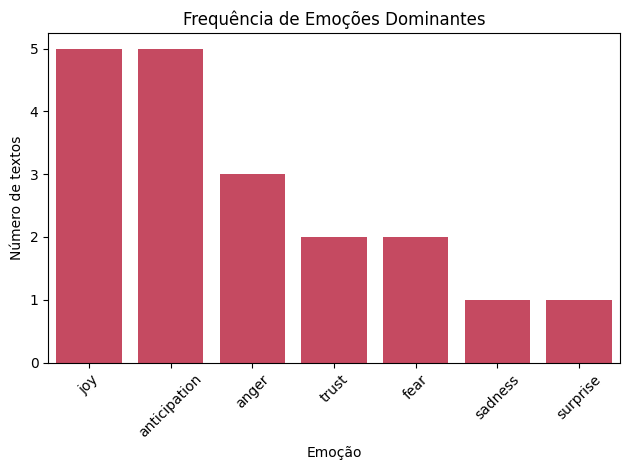

In [9]:
 # Cria um gráfico de barras com contagem
sns.countplot(
    x='sentiment',
    data=df,
    order=df['sentiment'].value_counts().index,  # Ordena as barras pela frequência de cada emoção
    color='#D93654'
)

# Construção do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()                             # Ajusta o layout para evitar que os textos fiquem cortados
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    A discografia possui alto teor de joy e anticipation.
</div>

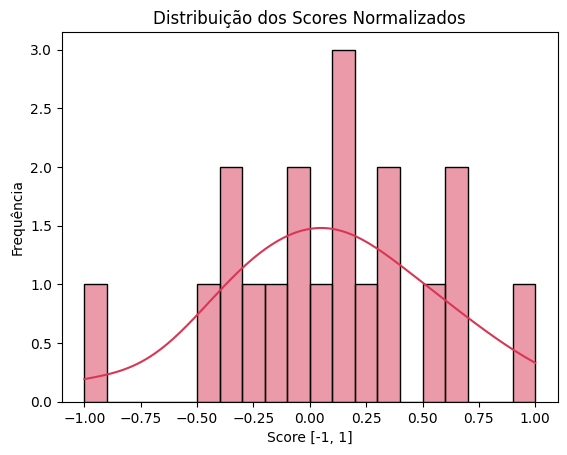

In [10]:
sns.histplot(df['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico</strong><br>
    Os scores estão bem distribuídos nas duas polaridades do gráfico, o que indica que a discografia é bem equilibrada.
</div>

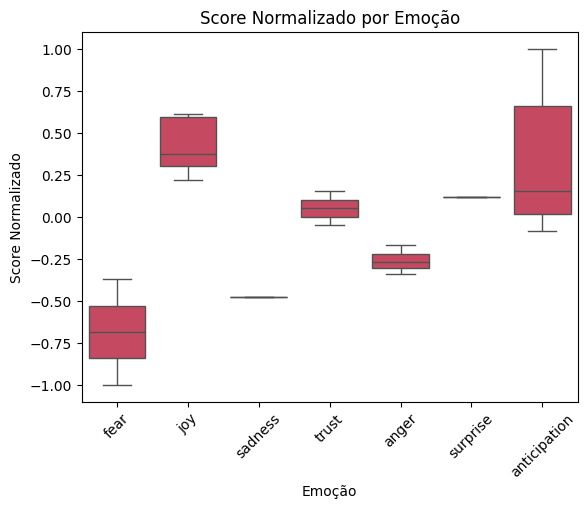

In [11]:
sns.boxplot(x='sentiment', y='score', data=df, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Esse gráfico boxplot compara os scores normalizados de sentimento para cada emoção.

- O **centro da caixa** é a **mediana** (valor do meio).
- As **caixas** mostram o intervalo interquartílico (de 25% a 75% dos dados).
- Os **"bigodes"** (linhas fora das caixas) mostram a dispersão.
- Os **pontos fora do padrão** são **outliers**.



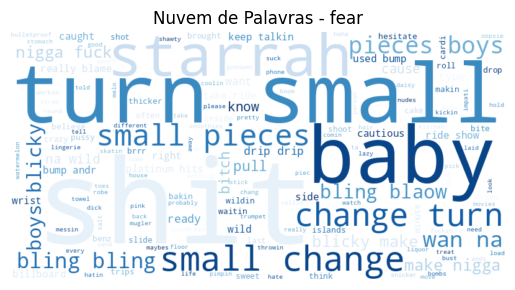

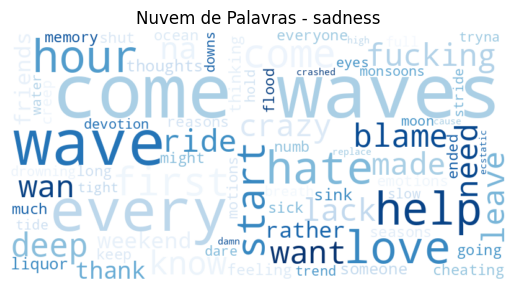

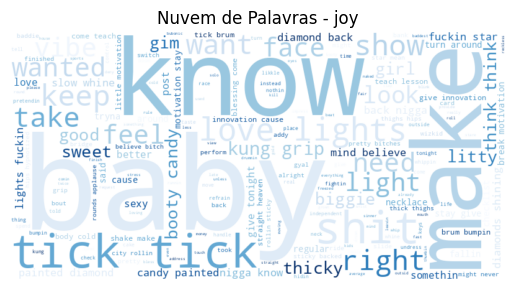

Nenhuma palavra encontrada para a emoção: disgust


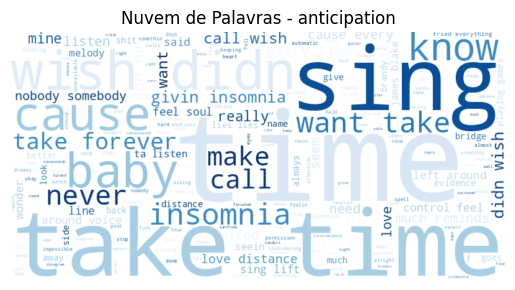

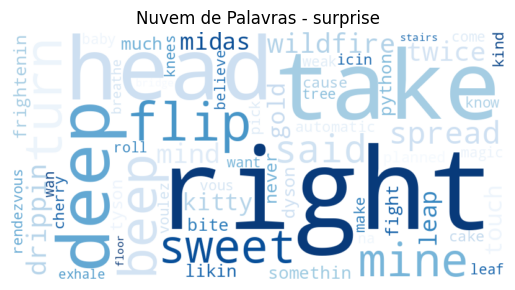

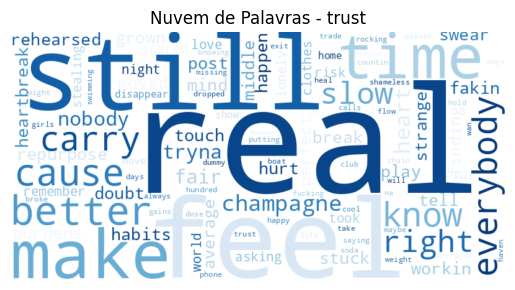

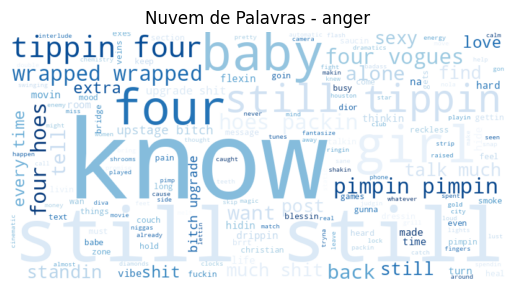

In [12]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []
    for text in df[df['sentiment'] == emotion]['lyrics']:
        words.extend(word_tokenize(text.lower()))

    # Verificar se há palavras antes de gerar a nuvem
    if not words:
        print(f"Nenhuma palavra encontrada para a emoção: {emotion}")
        continue

    # Gerar a nuvem de palavras com fundo branco e tons de azul
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',  # Fundo branco
        colormap='Blues'  # Paleta de tons de azul
    ).generate(' '.join(words))

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nuvem de Palavras - {emotion}')
    plt.show()

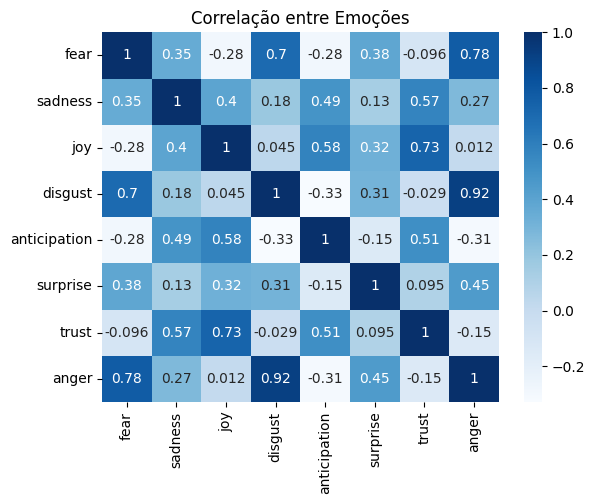

In [13]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

O **heatmap de correlação entre emoções** é super útil para entender **como diferentes emoções aparecem juntas nas letras analisadas**.Logo:

### Emoções que aparecem juntas com frequência
Anger & Desgust → 0.92
Letras com raiva geralmente apresentam sensação de desgosto.

Fear & Anger → 0.78
Músicas que expressam medo geralmente trazem raiva também — provavelmente ligadas a temas como decepção e aborrecimento.

### Emoções com baixa correlação

Sadness & Disgust → 0.18

## Análise de Debut Single

In [14]:
# Filtrando o DataFrame para excluir músicas do seu álbum
df_songs = df[df['Album'].isin(['DOPAMINE'])]

# Exibindo o DataFrame filtrado
df_songs

title                                             lyrics  \
1    Motivation  break motivation stay give tonight baby turn a...   
2         Waves  thank weekend friends rather liquor sink than ...   
4     Checklist  wizkid gyal come whine addy need diamonds shin...   
5          Fair  hundred days countin know favorite still when ...   
6     Slow Down  everybody slow down everybody everybody slow d...   
18  Sing to You  takes star light night clouds make rise melody...   

                      Album  release_year  Word Count     score     sentiment  \
1       Motivation - Single          2019         141  0.372881           joy   
2                       NaN          2018         190 -0.474576       sadness   
4   Normani x Calvin Harris          2018         199  0.610169           joy   
5                       NaN          2022         128  0.152542         trust   
6   Normani x Calvin Harris          2018         163 -0.050847         trust   
18                      NaN          2013         180  1.000000  anticipation   

     filter  
1   intenso  
2   intenso  
4   intenso  
5   intenso  
6    neutro  
18  intenso

In [15]:
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_songs['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 896 palavras no dataset de letra.
Existem 277 palavras únicas no dataset de letras.


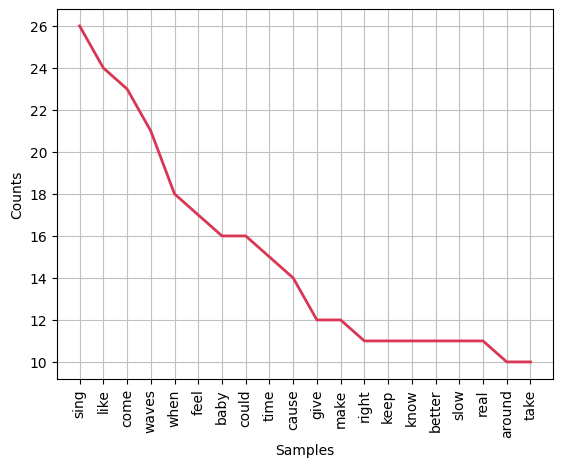

In [16]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

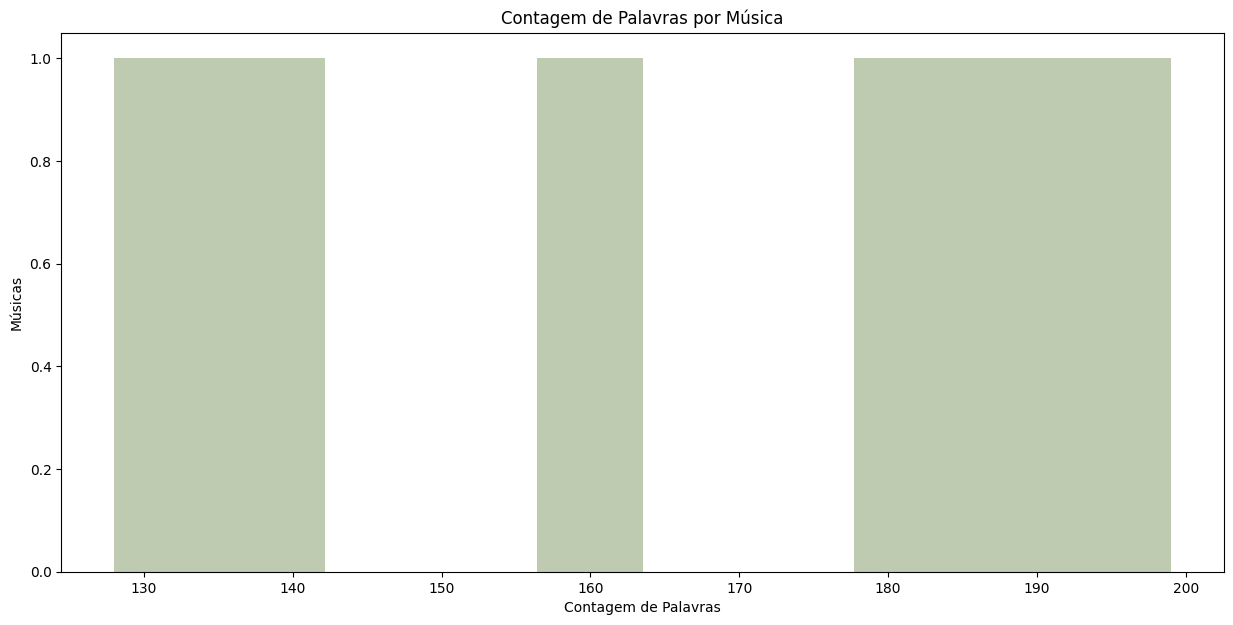

In [17]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_reflection
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_songs['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

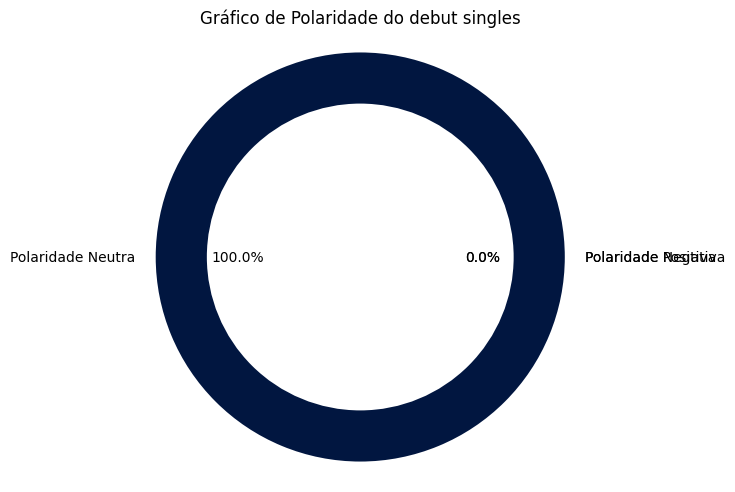

In [18]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_songs['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_songs['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do debut singles')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A discografia apresenta apenas polaridade neutra.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-19-7b5b8ab66772>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_songs['lyrics'] = df_songs['lyrics'].fillna('')  # Substitui valores nulos por string vazia


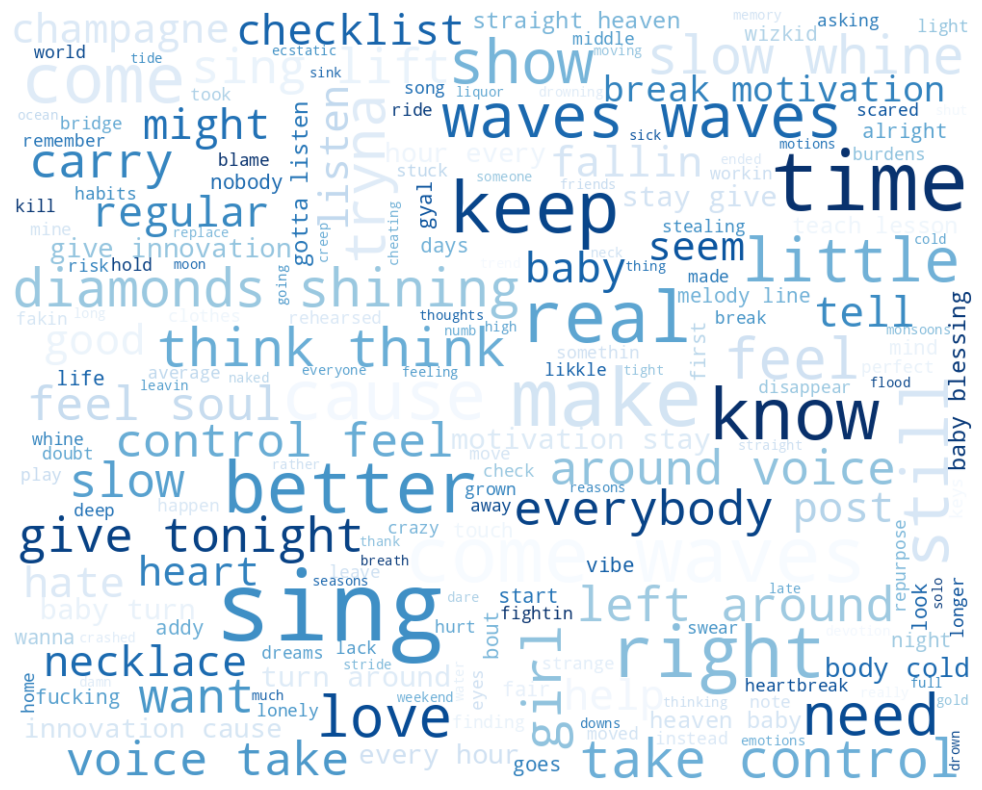

In [19]:
# Exibir os nomes das colunas do DataFrame
print(df_songs.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_songs.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_songs['lyrics'] = df_songs['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_songs['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

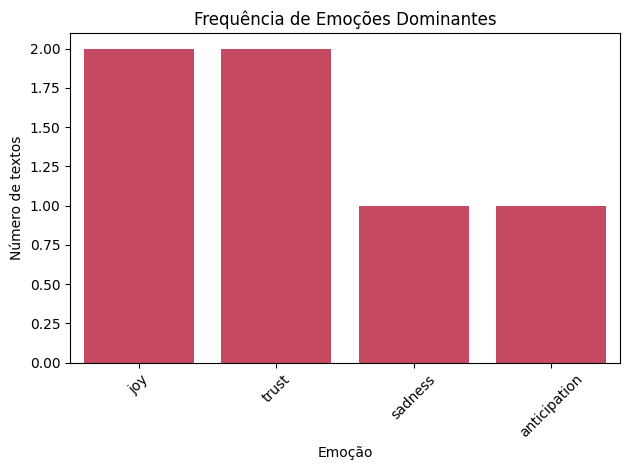

In [20]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_songs,
    order=df_songs['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

# Gerando o gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout() #Ajuste automático
plt.show()

Seus primeiros singles foram para um tom mais positivo, sendo as maiores emoções alegria e confiança.

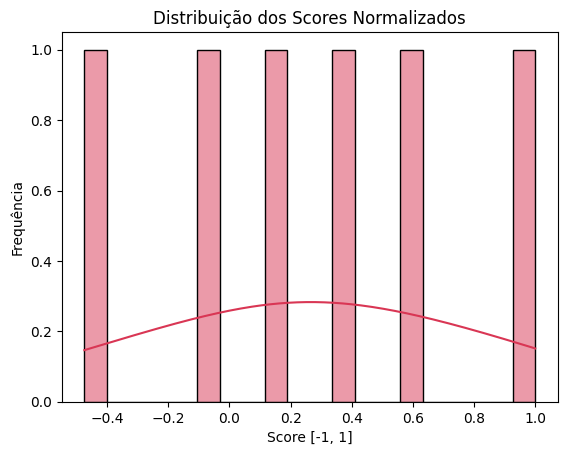

In [21]:
## Construção do Histograma
sns.histplot(df_songs['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

Emoções positivas tendem a mostrar polaridade positiva.

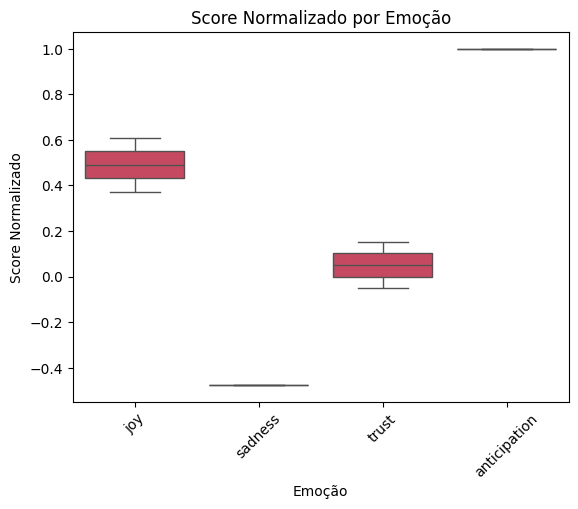

In [22]:
sns.boxplot(x='sentiment', y='score', data=df_songs, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

Nenhuma letra encontrada para a emoção 'fear'.


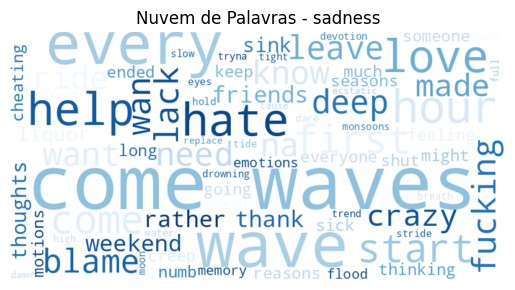

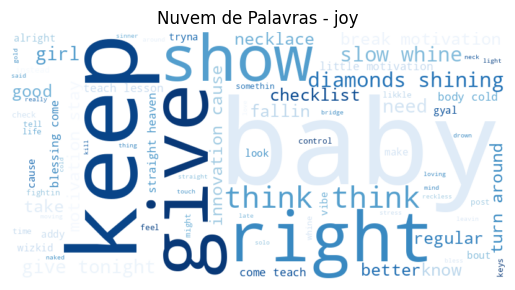

Nenhuma letra encontrada para a emoção 'disgust'.


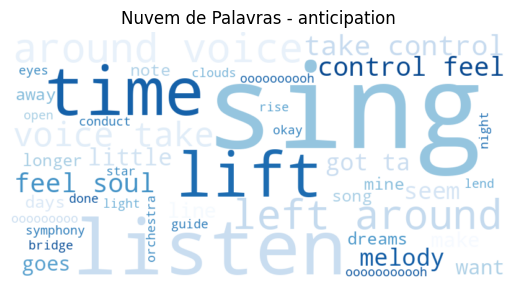

Nenhuma letra encontrada para a emoção 'surprise'.


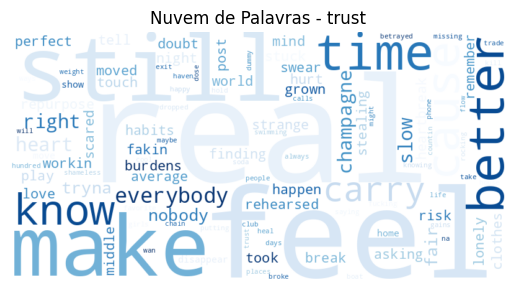

Nenhuma letra encontrada para a emoção 'anger'.


In [23]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_songs[df_songs['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

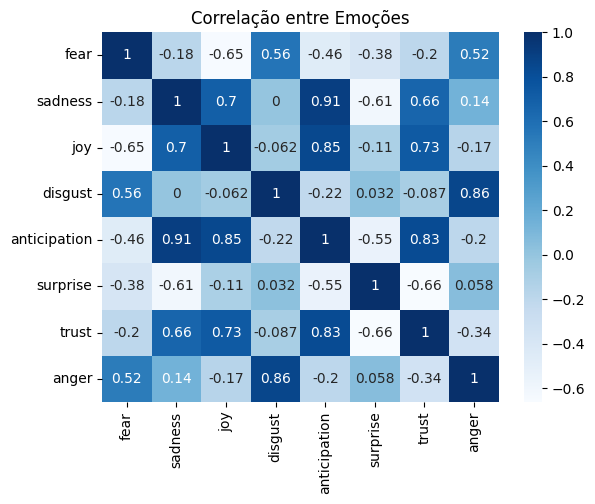

In [24]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_songs['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()

Análise do Gráfico

Em resumo, o debut singles apresentam uma coesão emocional entre sentimentos positivos, enquanto emoções negativas têm menos presença nas letras.

### Análise do Álbum DOPAMINE

*Dopamine* é o álbum de estreia da cantora norte-americana, lançado em 14 de junho de 2024 através da *RCA Records*.

Foi precedido pelos singles *1:59* e *Candy Paint* em abril e maio, bem como *Wild Side* (2021), que alcançou a 14ª posição da *Billboard Hot 100*.

Mais informações em: https://pt.wikipedia.org/wiki/Dopamine

In [25]:
# Filtrando o DataFrame pelo álbum
df_dopamine= df_original[df_original['Album'] == 'DOPAMINE']

# Exibindo o DataFrame filtrado
df_dopamine

title                                             lyrics  \
0        Wild Side  ready pull ready baby wanna shoot shot cause b...   
3      Candy Paint  bank roll thumbin baby know comin booty buboni...   
7             1:59  turn turn phone ringin time what mind brrt cal...   
8          Big Boy  starrah starrah kickin coolin bitch told stick...   
9        All Yours  there somethin likin much frightenin bite like...   
10           Still  still tippin four fours wrapped wrapped four v...   
11        Insomnia  thought going crazy better lately finally stop...   
12       Lights On  right there know feel even address unless undr...   
13        Tantrums  drop took minute hard tryin look back never th...   
14    Take My Time  ways explain emotions start racin every time c...   
15  Little Secrets  girl around want automatic want miss already h...   
16            Grip  kung grip kung grip thicky thicky vibe around ...   
17        Distance  said never gonna make want myself never gonna ...   

       Album  release_year  Word Count     score     sentiment   filter  
0   DOPAMINE          2021         246 -0.372881          fear  intenso  
3   DOPAMINE          2024         233  0.593220           joy  intenso  
7   DOPAMINE          2024         176 -0.271186         anger  intenso  
8   DOPAMINE          2024         287 -1.000000          fear  intenso  
9   DOPAMINE          2024         209  0.118644      surprise  intenso  
10  DOPAMINE          2024         269 -0.169492         anger  intenso  
11  DOPAMINE          2024         239 -0.084746  anticipation   neutro  
12  DOPAMINE          2024         199  0.305085           joy  intenso  
13  DOPAMINE          2024         163  0.152542  anticipation  intenso  
14  DOPAMINE          2024         165  0.661017  anticipation  intenso  
15  DOPAMINE          2024         173 -0.338983         anger  intenso  
16  DOPAMINE          2024         156  0.220339           joy  intenso  
17  DOPAMINE          2024         154  0.016949  anticipation  intenso

In [30]:
# Lista de palavras indesejadas presentes na discografia
indesejadas = ['yeah','shit','na','four','nigga']

# Remove palavras indesejadas, e salva de volta como um texto longo
df_dopamine['lyrics'] = df_dopamine['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))

# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_dopamine['lyrics'])
palavras = word_tokenize(text)

print("Existem {} palavras no dataset de letra.".format(len(palavras)))
print("Existem {} palavras únicas no dataset de letras.".format(len(set(palavras))))

Existem 2362 palavras no dataset de letra.
Existem 541 palavras únicas no dataset de letras.


<ipython-input-30-7eb61cd9399f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dopamine['lyrics'] = df_dopamine['lyrics'].apply(lambda x: ' '.join([palavra for palavra in x.split() if palavra not in (indesejadas)]))


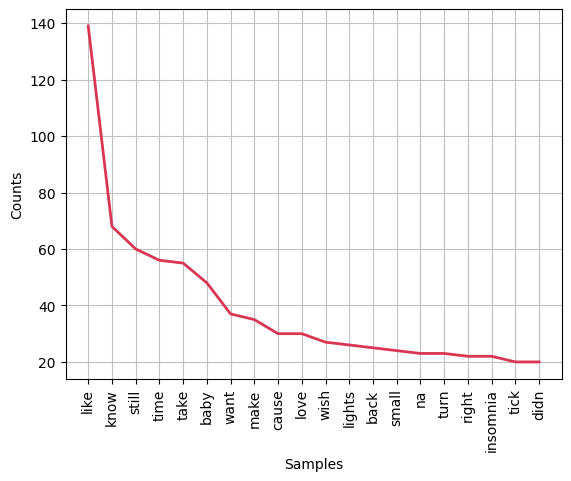

In [31]:
# Importa a classe FreqDist da biblioteca nltk, que é usada para calcular a frequência de distribuição de palavras
from nltk.probability import FreqDist

# Tokeniza o texto, dividindo-o em palavras individuais
words = word_tokenize(text)

# Cria uma distribuição de frequência das palavras no texto
fdist = FreqDist(words)

# Plota o gráfico de distribuição de frequência das 20 palavras mais comuns
# 'cumulative=False' indica que não será um gráfico acumulativo
# 'color' define a cor das barras no gráfico
fdist.plot(20, cumulative=False, color='#D93654')

# Exibe o gráfico gerado na tela
plt.show()

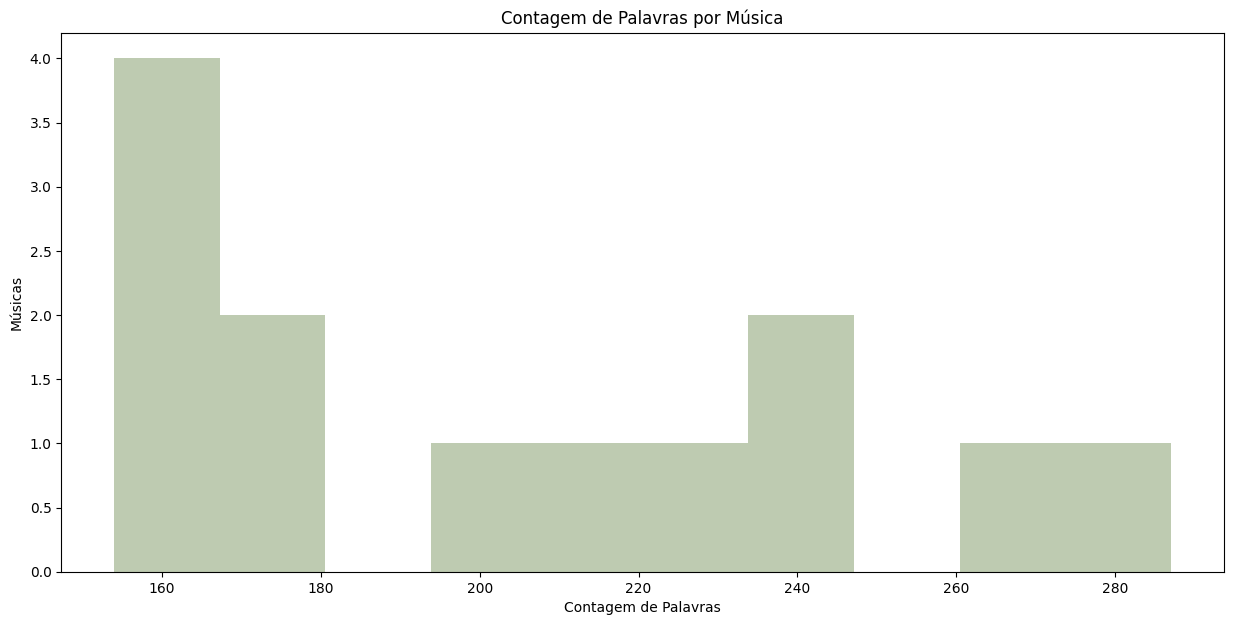

In [32]:
# Define o tamanho da figura do gráfico
plt.figure(figsize=(15, 7))

# Cria um histograma para a coluna 'Word Count' do DataFrame df_dopamine
# '10' especifica o número de bins (intervalos) no histograma
(n, bins, patches) = plt.hist(df_dopamine['Word Count'], bins=10, color='#BECBB1')

# Adiciona rótulo ao eixo x
plt.xlabel('Contagem de Palavras')

# Adiciona rótulo ao eixo y
plt.ylabel('Músicas')

# Adiciona um título ao gráfico
plt.title('Contagem de Palavras por Música')

# Exibe o gráfico
plt.show()

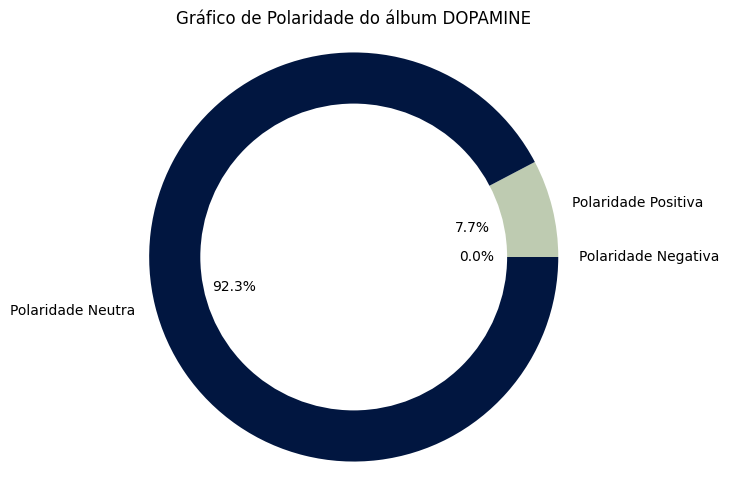

In [33]:
# Importa a classe SentimentIntensityAnalyzer do módulo nltk.sentiment
# Essa classe permite calcular a intensidade do sentimento de um texto
from nltk.sentiment import SentimentIntensityAnalyzer

# Cria uma instância do SentimentIntensityAnalyzer para analisar o sentimento
analyzer = SentimentIntensityAnalyzer()

# Analisa o sentimento de todas as letras juntas
# O método polarity_scores(text) retorna um dicionário com as pontuações de sentimento:
# 'neg' para negativo, 'neu' para neutro, 'pos' para positivo e 'compound' para uma pontuação geral
# Une o dataframe em uma string longa/TextBlob
text = " ".join(twt for twt in df_dopamine['lyrics'])
analyzer.polarity_scores(text)

# Análise de sentimento para cada música (com sentimento neutro incluído)

# Define uma função para obter o sentimento de cada letra individualmente
def fetch_sentiment(x):
    polarity = analyzer.polarity_scores(x)
    # Decide o sentimento com base na pontuação dominante
    if polarity['neu'] > polarity['pos'] and polarity['neu'] > polarity['neg']:
        return 'neu'
    elif polarity['pos'] >= polarity['neg']:
        return 'pos'
    else:
        return 'neg'

# Aplica a função à coluna de letras
sentiment = df_dopamine['lyrics'].apply(fetch_sentiment).value_counts()

# Garante que todas as categorias estejam presentes (mesmo que com 0)
sentiment = sentiment.reindex(['pos', 'neu', 'neg'], fill_value=0)

# Labels e cores
labels = ['Polaridade Positiva', 'Polaridade Neutra', 'Polaridade Negativa']
colors = ['#BECBB1', '#011640', '#D93654']

# Gráfico de pizza
plt.pie(sentiment, labels=labels, autopct='%1.1f%%', colors=colors)

# Círculo central (estilo donut)
cc = plt.Circle((0,0),0.75,fc='#FFFFFF')
fig = plt.gcf()
fig.gca().add_artist(cc)

# Exibição do gráfico
plt.tight_layout()
plt.title('Gráfico de Polaridade do álbum DOPAMINE')
plt.axis('equal')
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    O álbum apresenta 7.7% de polaridade positiva, mostrando que houve evolução emocional em relação as músicas anteriormente lançadas.
</div>

Index(['title', 'lyrics', 'Album', 'release_year', 'Word Count', 'score',
       'sentiment', 'filter'],
      dtype='object')


<ipython-input-34-6dae0d1de73b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dopamine['lyrics'] = df_dopamine['lyrics'].fillna('')  # Substitui valores nulos por string vazia


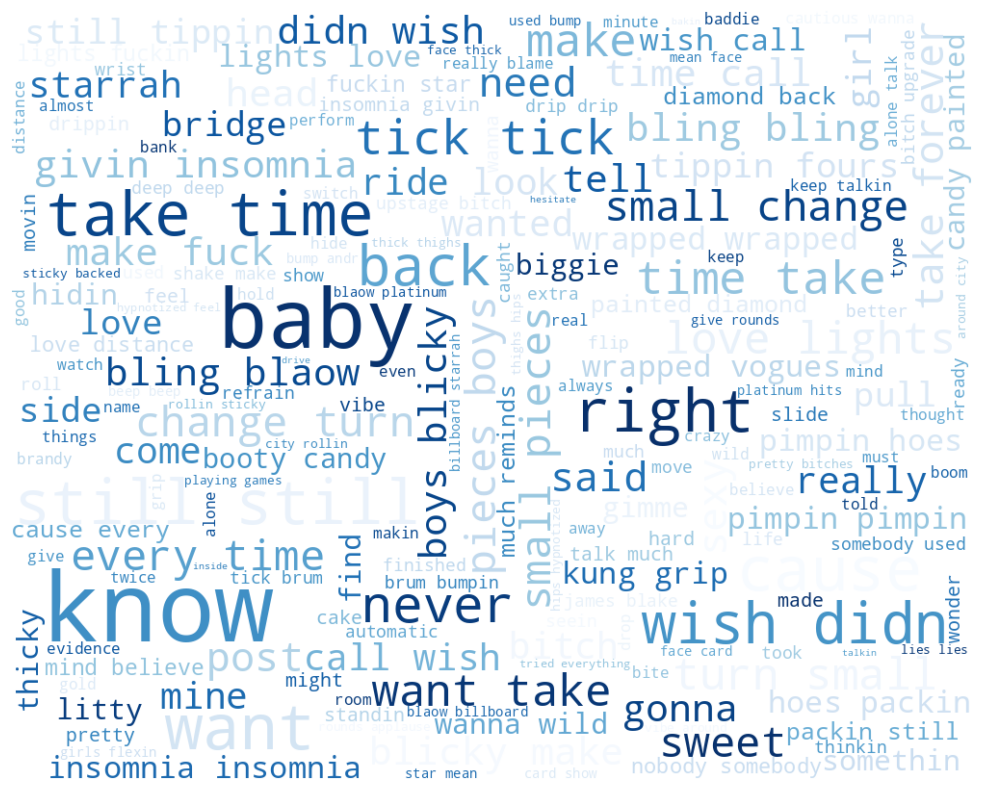

In [34]:
# Exibir os nomes das colunas do DataFrame
print(df_dopamine.columns)

# Verifica se a coluna 'Lyrics' existe
if 'lyrics' in df_dopamine.columns:
    # Verifica se não há valores nulos na coluna 'Lyrics'
    df_dopamine['lyrics'] = df_dopamine['lyrics'].fillna('')  # Substitui valores nulos por string vazia
    text = " ".join(twt for twt in df_dopamine['lyrics'])

    # Gerando a nuvem de palavras com um tema claro
    wc = WordCloud(
        width=1000,
        height=800,
        random_state=21,
        max_font_size=100,
        relative_scaling=0.5,
        colormap="Blues",  # Alterado para um esquema de cores de fundo branco
        background_color="white"  # Define fundo branco explicitamente
    ).generate(text)

    # Exibindo a nuvem de palavras
    plt.figure(figsize=(14, 10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
else:
    print("A coluna 'Lyrics' não foi encontrada no DataFrame.")

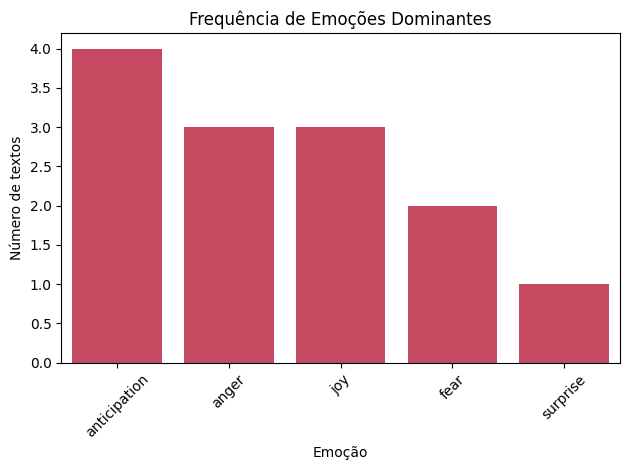

In [35]:
# Construção da barra por contagem
sns.countplot(
    x='sentiment',
    data=df_dopamine,
    order=df_dopamine['sentiment'].value_counts().index,
    color='#D93654'  # cor personalizada
)

#Exibição do gráfico
plt.title('Frequência de Emoções Dominantes')
plt.ylabel('Número de textos')
plt.xlabel('Emoção')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color: #e6f2ff; padding: 10px; border-radius: 5px;">
    <strong>Análise do Gráfico de Polaridade</strong><br>
    A evolução emocional se deve á formas alternativas da emoção anticipation.
</div>


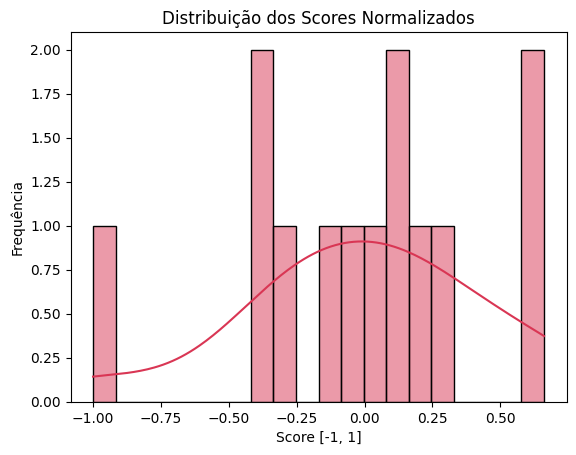

In [36]:
# Gerando o Histograma
sns.histplot(df_dopamine['score'], bins=20, kde=True, color='#D93654')
plt.title('Distribuição dos Scores Normalizados')
plt.xlabel('Score [-1, 1]')
plt.ylabel('Frequência')
plt.show()

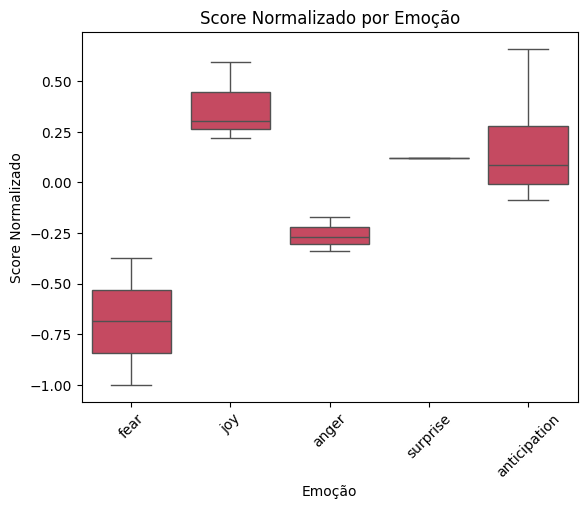

In [37]:
# Gerando o Boxplot
sns.boxplot(x='sentiment', y='score', data=df_dopamine, color='#D93654')
plt.title('Score Normalizado por Emoção')
plt.xlabel('Emoção')
plt.ylabel('Score Normalizado')
plt.xticks(rotation=45)
plt.show()

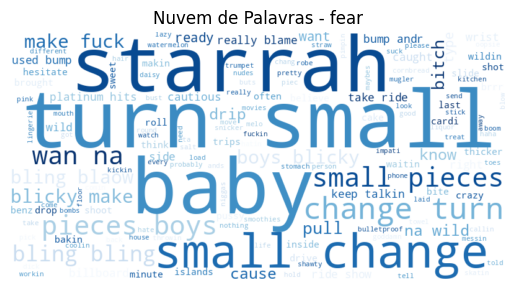

Nenhuma letra encontrada para a emoção 'sadness'.


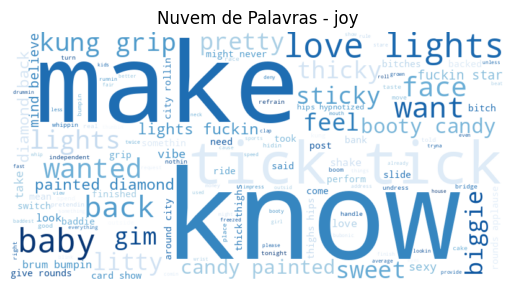

Nenhuma letra encontrada para a emoção 'disgust'.


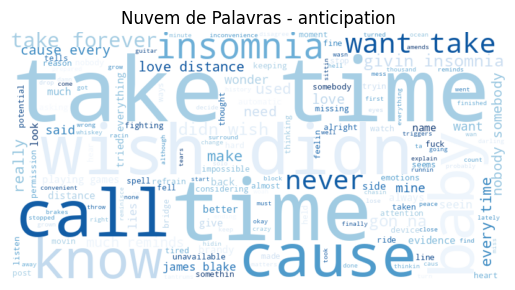

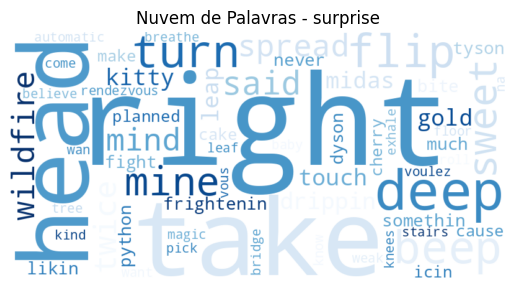

Nenhuma letra encontrada para a emoção 'trust'.


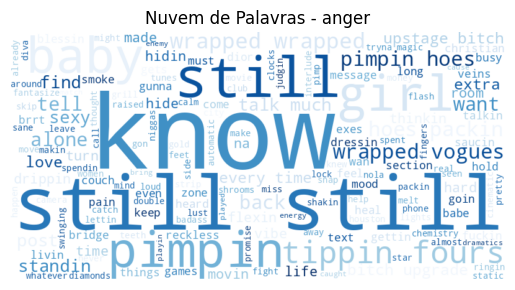

In [39]:
# Gerar a nuvem de palavras para cada emoção
for emotion in emotion_sentiments:
    words = []

    # Verificar se há letras associadas à emoção
    emotion_lyrics = df_dopamine[df_dopamine['sentiment'] == emotion]['lyrics']

    # Verifica se a emoção tem textos associados
    if not emotion_lyrics.empty:
        for text in emotion_lyrics:
            words.extend(word_tokenize(text.lower()))

        # Se houver palavras associadas à emoção
        if words:
            # Gerar a nuvem de palavras com fundo branco e tons de azul
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',  # Fundo branco
                colormap='Blues'  # Paleta de tons de azul
            ).generate(' '.join(words))

            # Mostrar a nuvem de palavras
            plt.figure()
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Nuvem de Palavras - {emotion}')
            plt.show()
        else:
            print(f"Nenhuma palavra encontrada para a emoção '{emotion}'.")
    else:
        print(f"Nenhuma letra encontrada para a emoção '{emotion}'.")

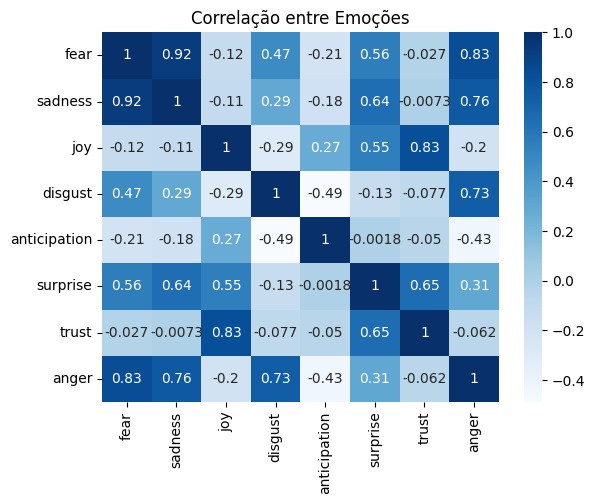

In [40]:
# Contar emoções por texto
emotion_columns = list(emotion_sentiments)
emotion_counts = []

for text in df_dopamine['lyrics']:
    tokens = word_tokenize(text.lower())
    counts = {emotion: 0 for emotion in emotion_columns}
    for token in tokens:
        for emotion in nrc_dict.get(token, []):
            counts[emotion] += 1
    emotion_counts.append(counts)

emotion_df = pd.DataFrame(emotion_counts)

# Gerar o heatmap com tons de azul
sns.heatmap(emotion_df.corr(), annot=True, cmap="Blues")
plt.title("Correlação entre Emoções")
plt.show()